In [1]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def options_from_dirname(dirname):
    tokens = dirname.split("_")
    epoch = int(tokens[3])
    built_ts = tokens[4]
    nr_samples = int(tokens[6])

    neg_samples = tokens[11] == "True"
    centroid_of_gt = tokens[16] == "True"
    center_of_bbox = tokens[21] == "True"
    quarter_four_points = tokens[26] == "True"
    bbox = tokens[28] == "True"
    jitter_bbox = float(tokens[30].replace("-", "."))
    freeze_sam_body = tokens[34] == "True"
    freeze_sam_head = tokens[38] == "True"
    return (
        epoch,
        built_ts,
        nr_samples,
        neg_samples,
        centroid_of_gt,
        center_of_bbox,
        quarter_four_points,
        bbox,
        jitter_bbox,
        freeze_sam_body,
        freeze_sam_head,
    )

In [37]:
experiments = {}

for experiment in Path("/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_amin").glob("*"):
    results = experiment / "inference" / "validation_results.csv"
    if '.csv' in experiment.name:
        continue
    df = pd.read_csv(results)
    dirname = experiment.name
    (
        epoch,
        built_ts,
        nr_samples,
        neg_samples,
        centroid_of_gt,
        center_of_bbox,
        quarter_four_points,
        bbox,
        jitter_bbox,
        freeze_sam_body,
        freeze_sam_head,
    ) = options_from_dirname(dirname)
    df["nr_samples"] = nr_samples
    df["neg_samples"] = neg_samples
    df["centroid_of_gt"] = centroid_of_gt
    df["center_of_bbox"] = center_of_bbox
    df["quarter_four_points"] = quarter_four_points
    df["bbox"] = bbox
    df["jitter_bbox"] = jitter_bbox
    df["freeze_sam_body"] = freeze_sam_body
    df["freeze_sam_head"] = freeze_sam_head
    df["dirname"] = dirname
    experiments[experiment.name] = df


In [4]:
# experiments[
#     '0_sam_torch_75_700_ce_0_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_True_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False'
# ]

In [5]:
# get_task_df('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_henry',
#             csv_filename = '/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_henry/kvasir.csv')

# get_task_df('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_yannik',
#             csv_filename = '/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_yannik/cadis.csv')

# get_task_df('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_amin',
#             csv_filename = '/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_amin/brats.csv')

# get_task_df('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_niklas',
#             csv_filename = '/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_niklas/bcss.csv')

In [6]:
# # domains = {'BCSS': {}, 'Kvasir': {}, 'CaDIS': {}, 'BraTS': {}}
# # domains = {'Kvasir': {}, 'CaDIS': {}, 'BraTS': {}}
# domains = {'BraTS': {}}
# experiments = {}

# for i, d in enumerate([ #'/media/aranem_locale/AR_subs_exps/SAM_white/models_archived/trained_models_niklas',
#                         # '/media/aranem_locale/AR_subs_exps/SAM_white/models_archived/trained_models_henry',
#                         # '/media/aranem_locale/AR_subs_exps/SAM_white/models_archived/trained_models_yannik',
#                         '/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_amin'
#                       ]):
#     for experiment in Path(d).glob("*"):
#         results = experiment / "inference" / "validation_results.csv"
#         if '.csv' in experiment.name:
#             continue
#         df = pd.read_csv(results)
#         dirname = experiment.name
#         (
#             epoch,
#             built_ts,
#             nr_samples,
#             neg_samples,
#             centroid_of_gt,
#             center_of_bbox,
#             quarter_four_points,
#             bbox,
#             jitter_bbox,
#             freeze_sam_body,
#             freeze_sam_head,
#         ) = options_from_dirname(dirname)
#         df["nr_samples"] = nr_samples
#         df["neg_samples"] = neg_samples
#         df["centroid_of_gt"] = centroid_of_gt
#         df["center_of_bbox"] = center_of_bbox
#         df["quarter_four_points"] = quarter_four_points
#         df["bbox"] = bbox
#         df["jitter_bbox"] = jitter_bbox
#         df["freeze_sam_body"] = freeze_sam_body
#         df["freeze_sam_head"] = freeze_sam_head
#         experiments[experiment.name] = df
#     domains[list(domains.keys())[i]] = experiments

In [7]:
# experiments = domains['BraTS']

In [38]:
for experiment, df in experiments.items():
    print(experiment)
    print(df.Dice.min())
    print(df.Dice.mean())
    print(df.Dice.max())
    print()

7_sam_torch_75_900_ce_10_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_False_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False
72.02722200801104
79.69652995918858
95.250890526319

8_sam_torch_75_900_ce_10_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_True_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False
73.80557634710779
80.31344621731598
95.09713748313185

9_sam_torch_75_900_ce_50_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_False_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False
76.31595497568475
83.51079260717948
97.47302288518736

0_sam_torch_75_900_ce_0_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_True_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False


In [39]:
DF = pd.concat(list(experiments.values()))

In [40]:
DF

,Epoch,Task,ID,Dice,IoU,nr_samples,neg_samples,centroid_of_gt,center_of_bbox,quarter_four_points,bbox,jitter_bbox,freeze_sam_body,freeze_sam_head,dirname
0,75,Task900_BCSS,TCGA-E2-A14N-DX1_xmin21383_ymin66838_MPP-0.2300,79.315945,73.577220,10,False,False,False,False,False,0.0,True,False,7_sam_torch_75_900_ce_10_samples_use_neg_sampl...
1,75,Task900_BCSS,TCGA-E2-A14X-DX1_xmin88836_ymin66393_MPP-0.2300,76.926183,72.498910,10,False,False,False,False,False,0.0,True,False,7_sam_torch_75_900_ce_10_samples_use_neg_sampl...
2,75,Task900_BCSS,TCGA-E2-A159-DX1_xmin38620_ymin28700_MPP-0.2300,76.989718,69.857090,10,False,False,False,False,False,0.0,True,False,7_sam_torch_75_900_ce_10_samples_use_neg_sampl...
3,75,Task900_BCSS,TCGA-E2-A1B6-DX1_xmin16266_ymin50634_MPP-0.2300,78.258766,75.050050,10,False,False,False,False,False,0.0,True,False,7_sam_torch_75_900_ce_10_samples_use_neg_sampl...
4,75,Task900_BCSS,TCGA-E2-A1L7-DX1_xmin51554_ymin15424_MPP-0.2300,77.525850,72.273160,10,False,False,False,False,False,0.0,True,False,7_sam_torch_75_900_ce_10_samples_use_neg_sampl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,75,Task900_BCSS,TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0.2300,37.243222,35.038110,3,False,False,False,False,False,0.0,True,False,5_sam_torch_75_900_ce_3_samples_use_neg_sample...
7,75,Task900_BCSS,TCGA-E2-A574-DX1_xmin54962_ymin47475_MPP-0.2300,36.493628,30.662663,3,False,False,False,False,False,0.0,True,False,5_sam_torch_75_900_ce_3_samples_use_neg_sample...
8,75,Task900_BCSS,TCGA-EW-A1P1-DX1_xmin50567_ymin38988_MPP-0.2300,36.618686,28.759490,3,False,False,False,False,False,0.0,True,False,5_sam_torch_75_900_ce_3_samples_use_neg_sample...
9,75,Task900_BCSS,TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0.2300,46.249717,41.713383,3,False,False,False,False,False,0.0,True,False,5_sam_torch_75_900_ce_3_samples_use_neg_sample...


In [41]:
# import paxplot

# cols = [
#     "jitter_bbox",
#     "neg_samples",
#     "centroid_of_gt",
#     "center_of_bbox",
#     "quarter_four_points",
#     "bbox",
#     # "freeze_sam_body",
#     # "freeze_sam_head",
#     "Dice",
# ]
# paxfig = paxplot.pax_parallel(n_axes=len(cols))
# paxfig.plot((DF[cols] * 1).to_numpy(), line_kwargs={"alpha": 0.2})

# paxfig.set_labels(cols)

# paxfig.add_colorbar(
#     ax_idx=len(cols) - 1, cmap="plasma", colorbar_kwargs={"label": "Dice"}
# )

# fig = plt.gcf()
# fig.set_size_inches(18.5, 10.5)

# plt.show()

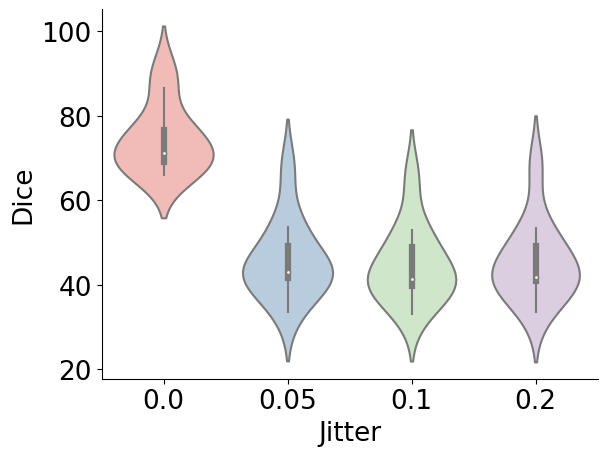

In [42]:
sns.violinplot(
    data=DF[
        (~DF.quarter_four_points)
        & (~DF.centroid_of_gt)
        & (~DF.center_of_bbox)
        & (DF.bbox)
        & (DF.nr_samples == 0)
    ],
    x="jitter_bbox",
    y="Dice",
    palette="Pastel1",
)
plt.xlabel("Jitter")
sns.despine()
plt.show()

In [43]:
print(
    DF[
        (~DF.quarter_four_points)
        & (~DF.centroid_of_gt)
        & (~DF.center_of_bbox)
        & (DF.bbox)
        & (DF.nr_samples == 0)
        & (DF.jitter_bbox == 0)
    ].Dice.max(),
    DF[(DF.nr_samples == 0) & (DF.jitter_bbox == 0.05)].Dice.max(),
)
print(
    DF[
        (~DF.quarter_four_points)
        & (~DF.centroid_of_gt)
        & (~DF.center_of_bbox)
        & (DF.bbox)
        & (DF.nr_samples == 0)
        & (DF.jitter_bbox == 0)
    ].Dice.min(),
    DF[(DF.nr_samples == 0) & (DF.jitter_bbox == 0.05)].Dice.min(),
)
print(
    DF[
        (~DF.quarter_four_points)
        & (~DF.centroid_of_gt)
        & (~DF.center_of_bbox)
        & (DF.bbox)
        & (DF.nr_samples == 0)
        & (DF.jitter_bbox == 0)
    ].Dice.mean(),
    DF[(DF.nr_samples == 0) & (DF.jitter_bbox == 0.05)].Dice.mean(),
)

91.29354247495492 67.75406041145965
65.89076740040589 33.43415538249779
74.5243825823647 46.00522795305262


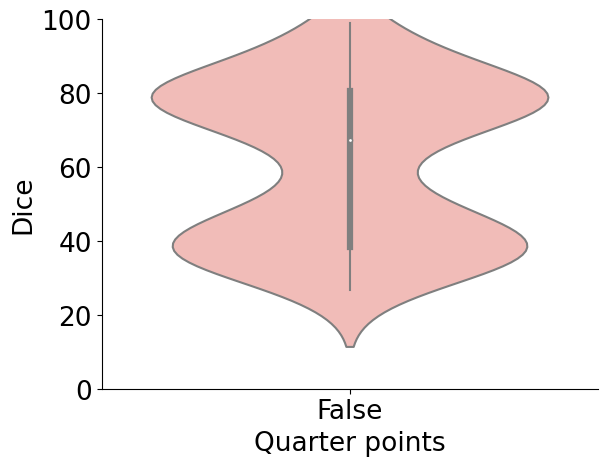

In [44]:
sns.violinplot(
    data=DF, x="quarter_four_points", y="Dice", palette="Pastel1", split=True
)
plt.xlabel("Quarter points")
plt.rcParams.update({'font.size': 19})
plt.ylim(0, 100)
sns.despine()
plt.show()


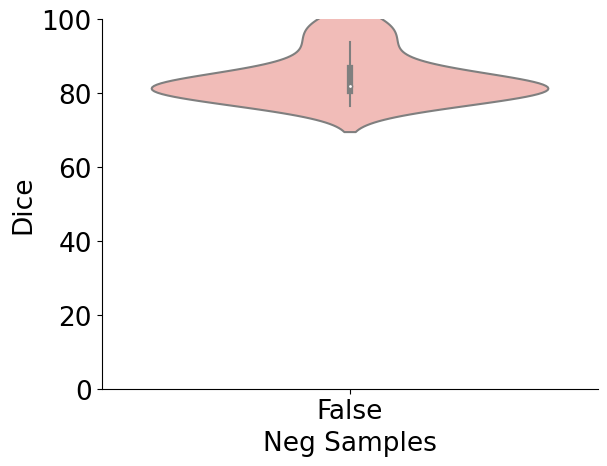

In [45]:
sns.violinplot(
    data=DF[
        (DF.quarter_four_points == False)
        & (DF.jitter_bbox == 0.0)
        & (DF.nr_samples == 100)
    ],
    x="neg_samples",
    y="Dice",
    palette="Pastel1",
    split=True,
)
plt.xlabel("Neg Samples")
plt.ylim(0, 100)
sns.despine()
plt.show()

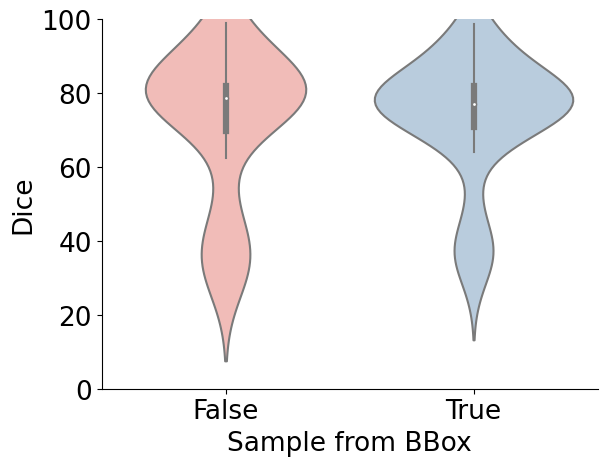

In [46]:
sns.violinplot(
    data=DF[
        (DF.quarter_four_points == False)
        & (DF.jitter_bbox == 0.0)
        & (DF.neg_samples == False)
    ],
    x="bbox",
    y="Dice",
    palette="Pastel1",
    split=True,
)
plt.xlabel("Sample from BBox")
plt.ylim(0, 100)
sns.despine()
plt.show()

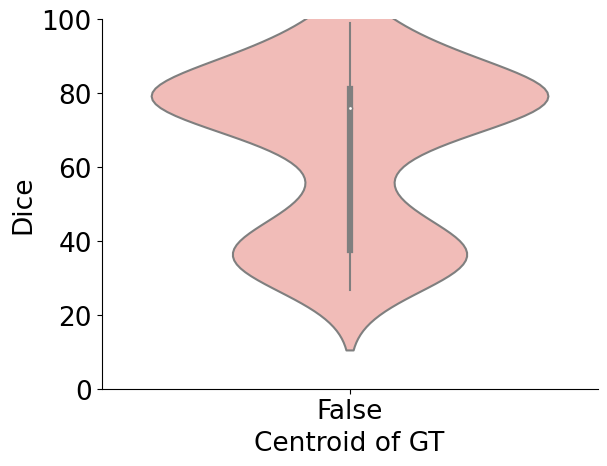

In [47]:
sns.violinplot(
    data=DF[(DF.quarter_four_points == False) & (DF.jitter_bbox == 0.0)],
    x="centroid_of_gt",
    y="Dice",
    palette="Pastel1",
    split=True,
)
plt.xlabel("Centroid of GT")
plt.ylim(0, 100)
sns.despine()
plt.show()

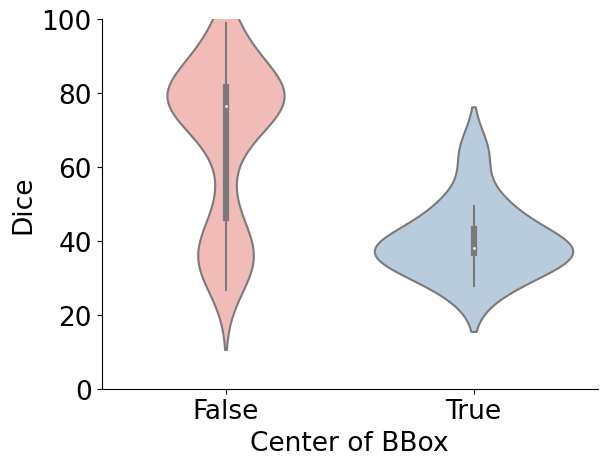

In [48]:
sns.violinplot(
    data=DF[(DF.quarter_four_points == False) & (DF.jitter_bbox == 0.0)],
    x="center_of_bbox",
    y="Dice",
    palette="Pastel1",
    split=True,
)
plt.xlabel("Center of BBox")
plt.ylim(0, 100)
sns.despine()
plt.show()

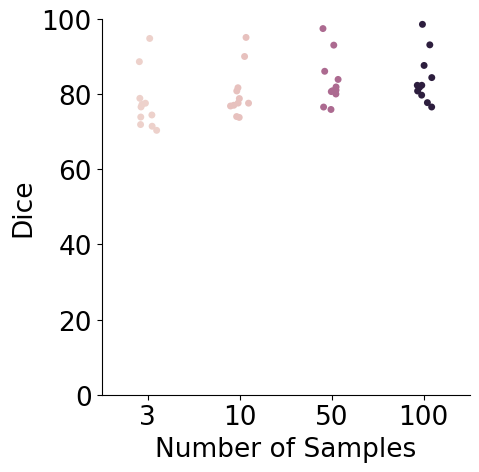

In [49]:
sns.catplot(
    data=DF[
        (DF.quarter_four_points == False)
        & (DF.jitter_bbox == 0.0)
        & (DF.nr_samples > 0)
        & (DF.bbox)
        & ~(DF.neg_samples)
    ],
    x="nr_samples",
    y="Dice",
    hue="nr_samples",
)

plt.xlabel("Number of Samples")
plt.ylim(0, 100)
sns.despine()
plt.show()

In [50]:
df_vanilla = DF[
    ~DF.quarter_four_points
    & (DF.jitter_bbox == 0.0)
    & (DF.nr_samples > 0)
    & DF.bbox
    & ~DF.neg_samples
]

print(df_vanilla.Dice.min())
challenging = df_vanilla[df_vanilla.Dice < 50]
challenging


70.36730657541612


,Epoch,Task,ID,Dice,IoU,nr_samples,neg_samples,centroid_of_gt,center_of_bbox,quarter_four_points,bbox,jitter_bbox,freeze_sam_body,freeze_sam_head,dirname


98.57714046425204
14_sam_torch_75_900_ce_100_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_True_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False
98.90384736361356
TCGA-E2-A1LK-DX1_xmin75611_ymin27593_MPP-0.2300


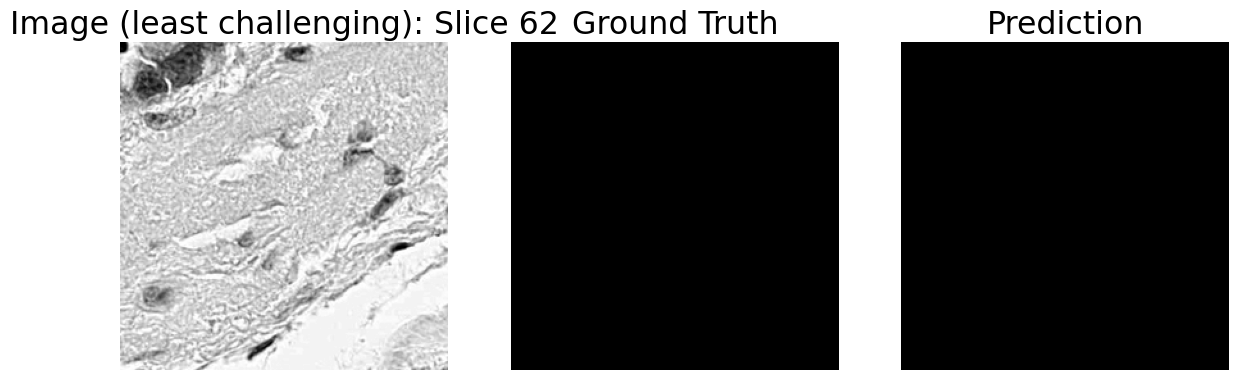

In [54]:
print(df_vanilla.Dice.max())
easy = df_vanilla.sort_values("Dice").iloc[-1]
# print(easy.Dice)
print(easy.dirname)


best = DF[DF.ID == easy.ID].sort_values("Dice").iloc[-1]
# best = DF[DF.ID == easy.ID].sort_values("Dice").iloc[0]
print(best.Dice)

best_path = Path('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_amin') / best.dirname / "inference" / "Epoch_75" / "Task700_BraTS2020" / best.ID
# best_path = Path('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_niklas') / best.dirname / "inference" / "Epoch_75" / "Task900_BCSS" / best.ID

print(easy.ID)
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI image
nii_path = best_path / "img.nii.gz"  # Replace with the correct file name
seg_path = best_path / "seg_gt.nii.gz"  # Replace with the segmentation file name
pred_path = best_path / "pred_seg.nii.gz"  # Replace with the predicted segmentation file name

# Load volumes
image_nii = nib.load(nii_path)
seg_nii = nib.load(seg_path)
pred_nii = nib.load(pred_path)

# Get the data array
image_data = image_nii.get_fdata()
seg_data = seg_nii.get_fdata()
pred_data = pred_nii.get_fdata()

# Select a random slice (assume axial orientation)
slice_idx = 57# np.random.randint(0, image_data.shape[2])  # Random slice index
# Slice 32 is good example
image_slice = np.rot90(np.rot90(np.rot90(image_data[:, :, slice_idx])))  # Rotate by 90 degrees
seg_slice = np.rot90(np.rot90(np.rot90(seg_data[:, :, slice_idx])))  # Rotate by 90 degrees
pred_slice = np.rot90(np.rot90(np.rot90(pred_data[:, :, slice_idx])))  # Rotate by 90 degrees

# Plot the random slice
plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_slice, cmap="gray")
plt.axis("off")
plt.title(f"Image (least challenging): Slice {slice_idx}")

# Ground truth segmentation
plt.subplot(1, 3, 2)
plt.imshow(seg_slice, cmap="gray")
plt.axis("off")
plt.title("Ground Truth")

# Predicted segmentation
plt.subplot(1, 3, 3)
plt.imshow(pred_slice, cmap="gray")
plt.axis("off")
plt.title("Prediction")

plt.tight_layout()
plt.show()


52.36734680492191
8_sam_torch_75_700_ce_3_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_True_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False
26.35511089299512
BraTS20_Training_320


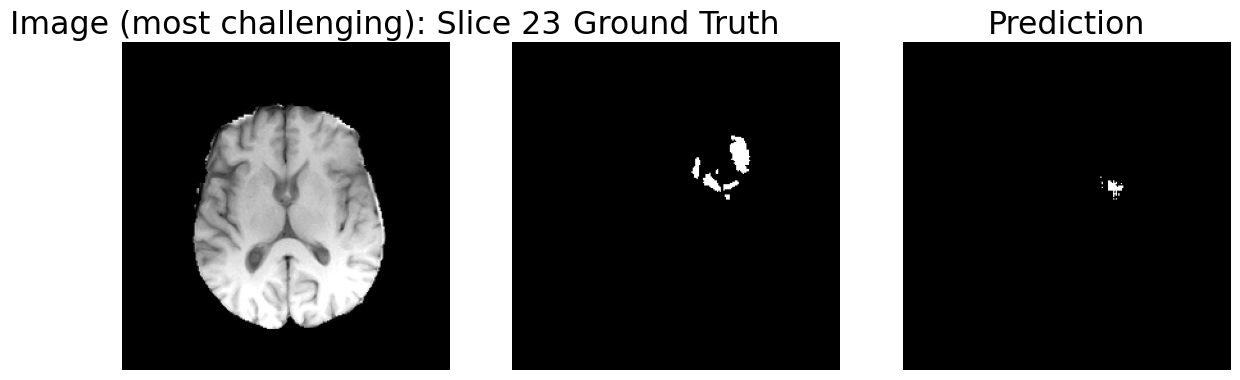

In [ ]:
print(df_vanilla.Dice.min())
difficult = df_vanilla.sort_values("Dice").iloc[0]
# print(difficult.Dice)
print(difficult.dirname)


best = DF[DF.ID == difficult.ID].sort_values("Dice").iloc[0]
# best = DF[DF.ID == difficult.ID].sort_values("Dice").iloc[-1]
print(best.Dice)


best_path = Path('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_amin') / best.dirname / "inference" / "Epoch_75" / "Task700_BraTS2020" / best.ID
# best_path = Path('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_niklas') / best.dirname / "inference" / "Epoch_75" / "Task900_BCSS" / best.ID

print(difficult.ID)
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load the NIfTI image
nii_path = best_path / "img.nii.gz"  # Replace with the correct file name
seg_path = best_path / "seg_gt.nii.gz"  # Replace with the segmentation file name
pred_path = best_path / "pred_seg.nii.gz"  # Replace with the predicted segmentation file name

# Load volumes
image_nii = nib.load(nii_path)
seg_nii = nib.load(seg_path)
pred_nii = nib.load(pred_path)

# Get the data array
image_data = image_nii.get_fdata()
seg_data = seg_nii.get_fdata()
pred_data = pred_nii.get_fdata()

# Select a random slice (assume axial orientation)
# Slice 23 is good example
slice_idx = 23# np.random.randint(0, image_data.shape[2])  # Random slice index
image_slice = np.rot90(np.rot90(np.rot90(image_data[:, :, slice_idx])))  # Rotate by 90 degrees
seg_slice = np.rot90(np.rot90(np.rot90(seg_data[:, :, slice_idx])))  # Rotate by 90 degrees
pred_slice = np.rot90(np.rot90(np.rot90(pred_data[:, :, slice_idx])))  # Rotate by 90 degrees

# Plot the random slice
plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_slice, cmap="gray")
plt.axis("off")
plt.title(f"Image (most challenging): Slice {slice_idx}")

# Ground truth segmentation
plt.subplot(1, 3, 2)
plt.imshow(seg_slice, cmap="gray")
plt.axis("off")
plt.title("Ground Truth")

# Predicted segmentation
plt.subplot(1, 3, 3)
plt.imshow(pred_slice, cmap="gray")
plt.axis("off")
plt.title("Prediction")

plt.tight_layout()
plt.show()

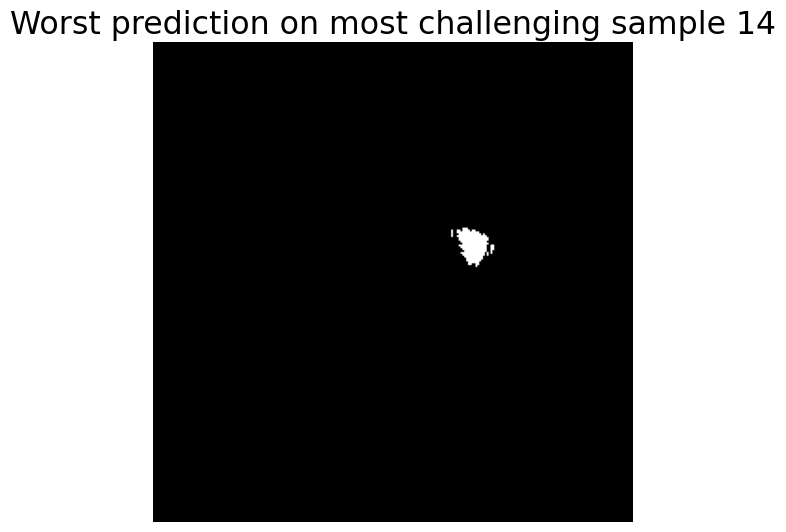

In [23]:
# 8_sam_torch_75_700_ce_3_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_True_jitter_0

# worst = DF[DF.ID == "BraTS20_Training_320"].sort_values("Dice").iloc[0]
worst = DF[DF.ID == "BraTS20_Training_320"].sort_values("Dice").iloc[-1]
# worst = DF[DF.ID == "TCGA-EW-A1P4-DX1_xmin17256_ymin35430_MPP-0.2300"].sort_values("Dice").iloc[0]

worst_path = (
    Path('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_amin')
    / worst.dirname
    / "inference"
    / "Epoch_75"
    / "Task700_BraTS2020"
    / worst.ID
)

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the NIfTI segmentation file
nii_file = worst_path / "pred_seg.nii.gz"  # Construct the file path
worst_seg = nib.load(nii_file).get_fdata()

# Select a slice to display (e.g., middle slice for visualization)
slice_idx = np.random.randint(0, image_data.shape[2])  # Random slice index
# 7 or 9 e.g. good
seg_slice = np.rot90(np.rot90(np.rot90(worst_seg[:, :, slice_idx])))  # Rotate 90 degrees for correct orientation

# Plot the slice
plt.imshow(seg_slice, cmap="gray")
plt.axis("off")
plt.title(f"Worst prediction on most challenging sample {slice_idx}")
plt.tight_layout(pad=0)
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()


In [23]:
experiments = {}

for experiment in Path('/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_niklas').glob("*"):
    image_name = "BraTS20_Training_320"
    image_path = (
        experiment
        / "inference"
        / "Epoch_75"
        / "Task900_BCSS"
        / image_name
        / "img.nii.gz"
    )
    # image = Image.open(image_path)

    dirname = experiment.name
    (
        epoch,
        built_ts,
        nr_samples,
        neg_samples,
        centroid_of_gt,
        center_of_bbox,
        quarter_four_points,
        bbox,
        jitter_bbox,
        freeze_sam_body,
        freeze_sam_head,
    ) = options_from_dirname(dirname)
    print(
        nr_samples,
        "centroid of gt:",
        centroid_of_gt,
        "center of bbox:",
        center_of_bbox,
        "negsamples:",
        neg_samples,
        "jitter:",
        jitter_bbox,
        "center_of_bbox:",
        center_of_bbox,
        "quarter_four_points:",
        quarter_four_points,
    )
    
    import nibabel as nib
    import matplotlib.pyplot as plt
    import numpy as np

    # Load a NIfTI image (example: pred_seg.nii.gz)
    nii = nib.load(image_path)
    image_data = nii.get_fdata()

    # Select a slice (e.g., middle slice or a challenging slice index)
    slice_idx = image_data.shape[2] // 2  # Example: middle slice
    image_slice = np.rot90(image_data[:, :, slice_idx])  # Rotate 90 degrees for proper orientation

    # Plot the image
    plt.imshow(image_slice, cmap="gray")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.show()


10 centroid of gt: False center of bbox: False negsamples: False jitter: 0.0 center_of_bbox: False quarter_four_points: False


FileNotFoundError: No such file or no access: '/media/aranem_locale/AR_subs_exps1/SAM_white/models_archived/trained_models_niklas/7_sam_torch_75_900_ce_10_samples_use_neg_samples_False_sample_centroid_of_gt_False_sample_center_of_bbox_False_samples_quarter_four_points_False_bbox_False_jitter_0-0_freeze_sam_body_True_freeze_sam_head_False/inference/Epoch_75/Task900_BCSS/BraTS20_Training_320/img.nii.gz'